In [1]:
import pandas as pd
from keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Tweets.csv')

In [3]:
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0,NaN,NaN,Virgin America,NaN,cairdin,NaN,0.0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0,Virgin America,NaN,jnardino,NaN,0.0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0.0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0.0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0,Can't Tell,1.0,Virgin America,NaN,jnardino,NaN,0.0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
review = data[['text', 'airline_sentiment']]

In [5]:
print("Shape: ",review.shape)
review.head()

Shape:  (24788, 2)


,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


In [6]:
data.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [7]:
review = review[review['airline_sentiment'] != 'neutral']
sentiment = review.airline_sentiment.factorize()
sentiment

(array([0, 1, 1, ..., 0, 1, 1]),
 Index(['positive', 'negative'], dtype='object'))

In [32]:
tweet = review.text.values
tweet = [str(t) for t in tweet]
tweet

["@VirginAmerica plus you've added commercials to the experience... tacky.",
 '@VirginAmerica it\'s really aggressive to blast obnoxious "entertainment" in your guests\' faces &amp; they have little recourse',
 "@VirginAmerica and it's a really big bad thing about it",
 "@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA",
 '@VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :)',
 "@virginamerica Well, I didn't…but NOW I DO! :-D",
 "@VirginAmerica it was amazing, and arrived an hour early. You're too good to me.",
 '@VirginAmerica I &lt;3 pretty graphics. so much better than minimal iconography. :D',
 "@VirginAmerica This is such a great deal! Already thinking about my 2nd trip to @Australia &amp; I haven't even gone on my 1st trip yet! ;p",
 "@VirginAmerica @virginmedia I'm flying your #fabulous #Seductive skies again! U take all the #stress away from travel http://t.co/ahlX

In [20]:
!pip install Tokenizer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 1.4 MB/s eta 0:00:00


In [33]:
from keras.preprocessing.text import Tokenizer

# Example list of tweets

# Create a tokenizer
tokenizer = Tokenizer(num_words=5000)

# Fit the tokenizer on the list of tweets
tokenizer.fit_on_texts(tweet)

# Now, the tokenizer is fitted on the provided texts


In [34]:
encoded_docs = tokenizer.texts_to_sequences(tweet)

In [36]:
!pip install pad_sequences

  Preparing metadata (setup.py) ... done
  Created wheel for pad_sequences: filename=pad_sequences-0.6.1-py3-none-any.whl size=10199 sha256=1f6540ebd7deba394c26b248d41faf71a7fa318d93ab4dc684904a5061362013
  Stored in directory: /root/.cache/pip/wheels/48/9d/22/0a6305b87a9cc46ccc032060a041c3b59f39ac462f7358997e
Successfully built pad_sequences


In [38]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

padded_sequence = pad_sequences(encoded_docs, maxlen=200)


In [39]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout,  Embedding,SpatialDropout1D

embedding_vector_length = 32
model = Sequential()
model.add(Embedding(5000, embedding_vector_length, input_length=200))
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 32)           160000    
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 200, 32)          0         
 lDropout1D)                                                     
                                                                 
 lstm_1 (LSTM)               (None, 50)                16600     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 176,651
Trainable params: 176,651
Non-trainable params: 0
________________________________________________

In [40]:
history = model.fiut(padded_sequence,sentiment[0],validation_split=0.2, epochs=5, batch_size=32)

Epoch 1/5
488/488 [==============================] - 154s 308ms/step - loss: 0.3249 - accuracy: 0.8654 - val_loss: 0.1319 - val_accuracy: 0.9495
Epoch 2/5
488/488 [==============================] - 159s 325ms/step - loss: 0.1690 - accuracy: 0.9359 - val_loss: 0.0962 - val_accuracy: 0.9651
Epoch 3/5
488/488 [==============================] - 147s 302ms/step - loss: 0.1294 - accuracy: 0.9535 - val_loss: 0.0745 - val_accuracy: 0.9731
Epoch 4/5
488/488 [==============================] - 150s 307ms/step - loss: 0.1020 - accuracy: 0.9624 - val_loss: 0.0625 - val_accuracy: 0.9754
Epoch 5/5
488/488 [==============================] - 160s 328ms/step - loss: 0.0909 - accuracy: 0.9672 - val_loss: 0.0633 - val_accuracy: 0.9739


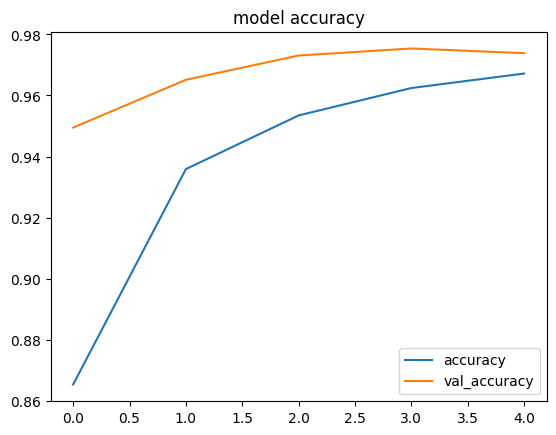

In [41]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.title('model accuracy')
plt.legend()
plt.show()

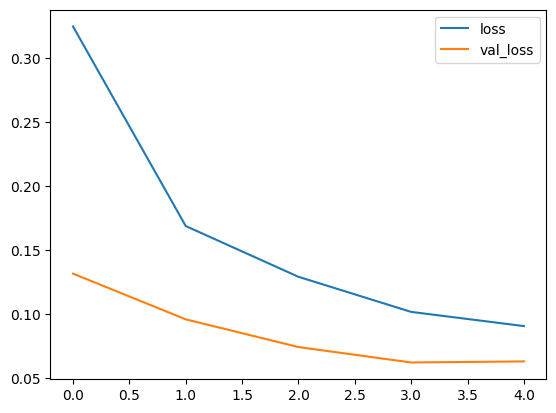

In [42]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')

plt.legend()
plt.show()


In [53]:
def predict_sentiment(text):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw,maxlen=200)
    prediction = int(model.predict(tw).round().item())
    print("Predicted label: ", sentiment[1][prediction])


test_sentence1 = "I love you"
predict_sentiment(test_sentence1)
test_sentence1 = "I hate you"
predict_sentiment(test_sentence1)

1/1 [==============================] - 0s 200ms/step
Predicted label:  positive
1/1 [==============================] - 0s 149ms/step
Predicted label:  negative
